# The next two cells deal with 
## barebones.py 

### HTML cell
The equations are given in HTML suitable for a web page. No attempt is made to derive them
### Python program cell
No explaination of how the equations are found is given. The program takes the input numbers and prints out the answers



<!DOCTYPE html>
<html>
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width">
  <title>MathJax example</title>
  <script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
  <script id="MathJax-script" async
          src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js">
  </script>
</head>
<body>
    
<h3>
    The given
</h3>    
<p>    
    <ul>
        <li>R = radius of the plunger</li>
        <li>c = the speed of a water wave</li>
        <li>v = the speed of the simulated object (use v = 0.7c as a default)</li>
        <li>n = number of plunger impressions</li>  
    </ul>   
</p>
<h3>
    What is to be calculated
</h3>  
<p>
    $$ \begin{align}
        x_{start}&=\ position\ of\ first\ impression\\
        \Delta x &=\ distance\ traveled\ between\ impressions\\
        \Delta t &=\ time\ spent\ traveling\ between\ impressions\\
        x_{tank} &=\ length\ of\ tank\\
        y_{tank} &=\ width\ of\ tank\\
    \end{align}
    $$

<h3>
    The equations
</h3>  
<p>
    $$ \begin{align}
        x_{start}&=R\left( \frac{3}{2}-\frac{1}{4n}\left(1+\frac{v}{c}\right)\right)\\
        \Delta x &= \frac{Rv}{nc}\\
        \Delta t &= \frac{R}{nc}\\
        x_{tank} &= \frac{R}{2}\left(5-\frac{3}{n}\frac{v}{c} +2\frac{v}{c}\right) \\
        y_{tank} &= R \left(2+\frac{n-1}{n}+\frac{\sqrt{c^2-v^2}}{2nc} \right)
    \end{align}
    $$
</p>
</body>
</html>



In [14]:
import math as m

# Input data
R = 40.0
c = 18.0 
v = c*0.7
n = 4


# Calculate values 
x_start = R*(3/2-(1+v/c)/4/n)
x_tank  = (R/2)*(5-3*v/n/c+2*v/c)
y_tank  = (  2*R + 
             R*(n-1)/n + 
             R/2/n/c*m.sqrt(c**2-v**2) 
             )
dt = R/n/c
dx = R*v/n/c

# print values
print('Given:' )
print(' R = radius of plunger     = {:5.2f} cm'.format(R))
print(' c = speed of water wave   = {:5.2f} cm/s'.format(c))
print(' v = simulated velocity    = {:5.2f} cm/s'.format(v))
print(' n = number of impressions = {}'.format(n))
print('If the left wall of the tank is x = 0 then:')
print(' first impressions is at {:5.2f}'.format(x_start))
print(' the tank length is      {:5.2f}'.format(x_tank))
print(' the tank width is       {:5.2f}'.format(y_tank))
print(' the plunger will make {} impressions {:5.2f} cm appart every {:5.2f}s'.
      format(n,dx,dt))



Given:
 R = radius of plunger     = 40.00 cm
 c = speed of water wave   = 18.00 cm/s
 v = simulated velocity    = 12.60 cm/s
 n = number of impressions = 4
If the left wall of the tank is x = 0 then:
 first impressions is at 55.75
 the tank length is      117.50
 the tank width is       113.57
 the plunger will make 4 impressions  7.00 cm appart every  0.56s


# The next cell is the program 
## SRbuildnumbers.py 

### Hand written notes:
There is a single page of calculations: images/ballpark.png  
on file to back up calculations used in program
### Python program cell
The program takes the input numbers and prints out the answers while attempting to be plain how the numbers are being generated.


Given:
R = radius of plunger     = 40.00 cm
c = speed of water wave   = 18.00 cm/s
v = simulated velocity    = 12.60 cm/s
n = number of impressions = 4

Important Results:
x_start = starting impression     = 55.75 cm
dx = distance between impressions =  7.00 cm
dt = time between impressions     =  0.56 s

Additional Timing details of sim:
time after first impression to start of sim 	=  2.22s
time for sim                 			=  3.00s
time after first impression to end of sim 	=  3.89s

Ellipse details:
(n-1) = number of ellipses   =  3.00
a   = length of major axis =  5.00 cm
b   = length of minor axis =  3.57 cm
f   = focal length         =  3.50 cm

Sweetspot Size:
x sweet spot		= 24.00 cm
y sweet spot		=  7.14 cm

Tank Size
y tank 			= 113.57 cm
x tank 			= 117.50 cm


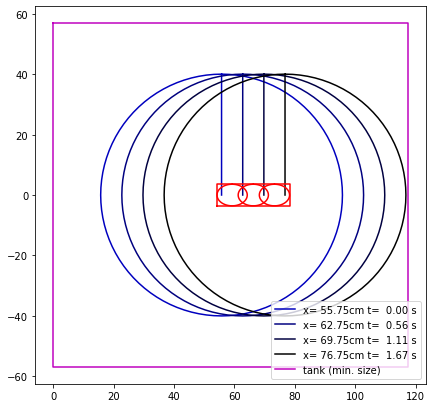

In [1]:
import math as m
import matplotlib.pyplot as plt

def not_a_num(number):
    '''Will check to see if the value passed to the functions is a float or and int'''
    if type(number)!=int and type(number)!=float:
        return True
    else:
        return False

def check_given(R,c,v,n):
    '''Will check to see if the numbers passed to functions are within 
    acceptable ranges. Will print warnings and replace offencing data
    with defaults to allow program to continue.'''
    # check inputs are correct types
    if not_a_num(R):
        print('WARNING: R must be number  \nSet to default 1.0 ')
        R = 1.0
    if not_a_num(c):
        print('WARNING: c must be number  \nSet to default 18.0 ')
        c = 18.0
    if not_a_num(v):
        print('WARNING: v must be number  \nSet to default v*0.7 ')
        v= 0.7*c
    if type(n)!= int:
        print('WARNING: n must be an integer \n Set to default 2 ')
        n = 2
        
    # check number ranges    
    if R<=0 or R>200.:
        print('WARNING: Check range of R.  \nSet to default 1.0 ')
        R = 1.0
    if c<=0:
        print('WARNING: Check range of c.  \nSet to default of 18.0 ')
        c = 18.0
    if v<=0 or v>c:
        print('WARNING: Check range of v.  \nSet to default 0.7c ')
        v = 0.7*c
    if  n<2:
        print('WARNING: Check range of n.  \nset to default 2.0 ')
        n = 2
        
    return R,c,v,n



def find_dx_dt():
    '''Calculates the most important values: dx and dt
    dx = how much the plunger must move
    dt = the time this move must be executed
    '''
    dt = R/n/c
    dx = R*v/n/c
    return dx,dt

def find_ellipse_data():
    '''Finds the data for the small ellipses
    a = major axis
    b = minor axis
    f = the focal length (often denoted with c in math texts but avoided here)
    (n-1) = number of small ellipses
    tf = the time required for the wave to travel 1/2 the distance from f to 
    perimeter ellipse and back to second f
    '''
    b = R/2/n/c*m.sqrt(c**2-v**2)
    tf = R/2/n/c
    a = c*tf    
    f = v*tf
    return a,b,f,tf  



def find_timing():
    ''' Calculates additional timing details:
    1) t_str = intial time delay from first impression to actual start of 
     simulation in sweetspot
    2) t_sim = length of time waves are simulating effect in sweetspot
    3) t_end = the end of the sim in the sweetspot'''
    t_str = R/c
    t_sim = 2*tf*(n-1)
    t_end = R/c+t_sim
    return t_str,t_sim,t_end

def find_sweetspot():
    '''finds the length and width of the sweetspot surrounding the 
    small ellipses
    (0,0) is set at the left most focal point for the n=0 impression'''
    # Calculate the y "sweet spot" where simulation will take place
    sweet_l = -(a-f)
    sweet_r = sweet_l+2*a+2*f*(n-2)
    sweet_t =b
    sweet_b =-b
    return sweet_l,sweet_r,sweet_t,sweet_b

def find_tanksize():
    '''Calculates the dimentions the rectagular tank required to hold the simulation.
    Criteria: unwanted wave cannot reflect back into sweetspot before end of 
    simulation
    '''
    tanks_t =  (R+b+c*t_sim+R)/2
    tanks_b = -tanks_t
    tanks_l = (-R -
              (a-f)-
              (R+c*t_sim))  /2
    tanks_r = 2*f*(n-1)+(R+R+(a-f))/2
    return tanks_l,tanks_r,tanks_t,tanks_b


def print_data():
    '''Prints given and all data calculated from that given'''
    print('Given:' )
    print('R = radius of plunger     = {:5.2f} cm'.format(R))
    print('c = speed of water wave   = {:5.2f} cm/s'.format(c))
    print('v = simulated velocity    = {:5.2f} cm/s'.format(v))
    print('n = number of impressions = {}'.format(n))
    print('\nImportant Results:')
    print('x_start = starting impression     = {:5.2f} cm'.
          format(R*(3/2-(1+v/c)/4/n)))
    print('dx = distance between impressions = {:5.2f} cm'.format(dx))
    print('dt = time between impressions     = {:5.2f} s'.format(dt) )

    print('\nAdditional Timing details of sim:')
    print('time after first impression to start of sim \t= {:5.2f}s'.format(t_str))
    print('time for sim                 \t\t\t= {:5.2f}s'.format( n-1,2*tf,t_sim))
    print('time after first impression to end of sim \t= {:5.2f}s'.format(t_end))
    print('\nEllipse details:')
    print('(n-1) = number of ellipses   = {:5.2f}'.format((n-1)))
    print('a   = length of major axis = {:5.2f} cm'.format(a))
    print('b   = length of minor axis = {:5.2f} cm'.format(b))
    print('f   = focal length         = {:5.2f} cm'.format(f))
    print('\nSweetspot Size:')
    print('x sweet spot\t\t= {:5.2f} cm'.format(sweet_r-sweet_l))
    print('y sweet spot\t\t= {:5.2f} cm'.format(sweet_t-sweet_b))
    print('\nTank Size')
    print('y tank \t\t\t= {:5.2f} cm'.format(tanks_t-tanks_b))
    print('x tank \t\t\t= {:5.2f} cm'.format(tanks_r-tanks_l))
   
def ellipse(xcenter=0.0,ycenter=0.0,a=1.0,b=1.0,num_points = 30):
    '''Lists xs and ys are cleared then data for an ellipse installed.
      1) ellipse center is on (xcenter,ycenter)
      2) a = major axis (x-axis)
      3) b = minor axis (y-axis)
      4) num_points = number of points in ellipse
    '''
    xs=[]
    ys=[]
    angle_inc = 2*m.pi/num_points
    for num in range(0,num_points+1):
        xs.append(a*m.cos(num*angle_inc+m.pi/2)+xcenter)
        ys.append(b*m.sin(num*angle_inc+m.pi/2)+ycenter)
    return xs,ys

def ellipse_plus_c(xcenter=0.0,ycenter=0.0,a=1.0,b=1.0,num_points = 30):
    '''Calls ellipse() to install data for an ellipse, 
    then adds the center to coordinate list (xs,ys)'''
    xs,ys = ellipse(xcenter,ycenter,a,b,num_points)
    xs.append(xcenter)
    ys.append(ycenter)
    return xs,ys

def draw_tank(show_waves_at_end=False):
    '''draws the tank, '''
    # set defaults for image
    plt.figure(figsize=(7,7))
    color_tank = 'm'
    color_sweet = 'r'
    color_ellipses = 'r'
   
    # Draw in size of unwanted waves at end of simulation
    # NOTE: Used to check formulas. May be of use but  
    # will likely end up as dead code with no future use.
    if show_waves_at_end:
        for i in range(0,n):
            xs,ys = ellipse_plus_c(2*i*f-tanks_l,0.0,2*R+c*((n-1)-i)*dt,
                                   2*R+c*((n-1)-i)*dt,100)
            grey = 1.0-(i+1)/n
            col=(0,0,grey)
            time = 'x= {:5.2f}cm t= {:5.2f} s'.format(2*i*f-tanks_l,i*dt)
            plt.plot(xs,ys,color=col)
    
    # draw in placement of impressions of plunger
    for i in range(0,n):
        xs,ys = ellipse_plus_c(2*i*f-tanks_l,0.0,R,R,100)
        grey = 1.0-(i+1)/n
        col=(0,0,grey)
        time = 'x= {:5.2f}cm t= {:5.2f} s'.format(2*i*f-tanks_l,i*dt)
        plt.plot(xs,ys,color=col,label=time)
        
            
    # draw in tank or tank
    xs=[0.0,tanks_r-tanks_l,tanks_r-tanks_l,0.0,0.0]
    ys=[tanks_t,tanks_t,tanks_b,tanks_b,tanks_t]
    plt.plot(xs,ys,'-',color = color_tank,label ='tank (min. size)')

    # small ellipses
    for i in range(0,(n-1)):
        xs,ys = ellipse(f+2*f*i-tanks_l,0.0,a,b,100)
        plt.plot(xs,ys,'-',color = color_ellipses)
    # sweetspot around small ellipses    
    xs=[sweet_l-tanks_l,sweet_l-tanks_l,sweet_r-tanks_l,
        sweet_r-tanks_l,sweet_l-tanks_l]
    ys=[sweet_b,sweet_t,sweet_t,sweet_b,sweet_b]
    plt.plot(xs,ys,'-',color = color_sweet)

    plt.axis('scaled')
    plt.legend(loc='lower right')
    plt.show()
    


R = 40.0
c = 18.0 
v = c*0.7
n = 4

R,c,v,n =check_given(R,c,v,n)
dx,dt = find_dx_dt()
a,b,f,tf = find_ellipse_data()

t_str,t_sim,t_end = find_timing()
sweet_l,sweet_r,sweet_t,sweet_b = find_sweetspot()
tanks_l,tanks_r,tanks_t,tanks_b = find_tanksize()

print_data()
draw_tank(show_waves_at_end=False)


